# Data Source

Use the Credit Card Approval dataset from the UCI Machine Learning Repository Link: https://archive.ics.uci.edu/dataset/27/credit+approval

# Import library

In [55]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Explore Data

In [56]:
# Load the dataset
cc_apps = pd.read_csv("cc_approvals.data", header=None) 
cc_apps

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [57]:
# Load the dataset
cc_apps = pd.read_csv("cc_approvals.data", header=None) 
# Drop the features 11 and 13
cc_apps = cc_apps.drop([11, 13], axis=1)
cc_apps

,0,1,2,3,4,5,6,7,8,9,10,12,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,g,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,g,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,g,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,g,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,s,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,g,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,g,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,g,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,g,750,-


In [58]:
for col in cc_apps.columns:
    print(col)
    print(cc_apps[col].unique())
    print(cc_apps[col].dtype)
    print("-------------------")
    

0
['b' 'a' '?']
object
-------------------
1
['30.83' '58.67' '24.50' '27.83' '20.17' '32.08' '33.17' '22.92' '54.42'
 '42.50' '22.08' '29.92' '38.25' '48.08' '45.83' '36.67' '28.25' '23.25'
 '21.83' '19.17' '25.00' '47.75' '27.42' '41.17' '15.83' '47.00' '56.58'
 '57.42' '42.08' '29.25' '42.00' '49.50' '36.75' '22.58' '27.25' '23.00'
 '27.75' '54.58' '34.17' '28.92' '29.67' '39.58' '56.42' '54.33' '41.00'
 '31.92' '41.50' '23.92' '25.75' '26.00' '37.42' '34.92' '34.25' '23.33'
 '23.17' '44.33' '35.17' '43.25' '56.75' '31.67' '23.42' '20.42' '26.67'
 '36.00' '25.50' '19.42' '32.33' '34.83' '38.58' '44.25' '44.83' '20.67'
 '34.08' '21.67' '21.50' '49.58' '27.67' '39.83' '?' '37.17' '25.67'
 '34.00' '49.00' '62.50' '31.42' '52.33' '28.75' '28.58' '22.50' '28.50'
 '37.50' '35.25' '18.67' '54.83' '40.92' '19.75' '29.17' '24.58' '33.75'
 '25.42' '37.75' '52.50' '57.83' '20.75' '39.92' '24.75' '44.17' '23.50'
 '47.67' '22.75' '34.42' '28.42' '67.75' '47.42' '36.25' '32.67' '48.58'
 '33.58' '

# Clean Data

In [59]:
# Replace ? into NAN
cc_apps = cc_apps.replace("?" , np.NaN)
# Checking missing value
cc_apps.isna().sum()

0     12
1     12
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
12     0
14     0
15     0
dtype: int64

In [60]:
# Impute category data with most frequency & Imput numerical data with mean 
for col in cc_apps.columns:
    if cc_apps[col].dtype == 'int64' or cc_apps[col].dtype == 'float64':
        cc_apps[col].fillna(cc_apps[col].mean(), inplace=True)
    else:
        cc_apps[col].fillna(cc_apps[col].value_counts().index[0], inplace=True)
cc_apps.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
12    0
14    0
15    0
dtype: int64

# Model Prediction

In [94]:
# Split data into train test before encoding
cc_apps_train , cc_apps_test = train_test_split(cc_apps , test_size = 0.2 , random_state = 1234 , stratify=cc_apps[15])
# Encoding 
# Convert the categorical features in the train and test sets independently
cc_apps_train_encoding = pd.get_dummies(cc_apps_train)
cc_apps_test_encoding = pd.get_dummies(cc_apps_test)
# Reindex the columns of the test set aligning with the train set
cc_apps_test_encoding = cc_apps_test_encoding.reindex(
    columns=cc_apps_train_encoding.columns, fill_value=0)
# Segregate features and labels into separate variables
X_train, y_train = (
                    cc_apps_train_encoding.iloc[:, :-1].values,
                    cc_apps_train_encoding.iloc[:, [-1]].values,
                    )
X_test, y_test = (
                    cc_apps_test_encoding.iloc[:, :-1].values,
                    cc_apps_test_encoding.iloc[:, [-1]].values
                    )

In [95]:
# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range = (0,1)) 
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

#Logistic Regression
logreg = LogisticRegression()

# Fit model 
logreg.fit(rescaledX_train , y_train)
# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)

# Print the confusion matrix of the logreg model
print(confusion_matrix(y_test, y_pred))

# Define the grid of values for tol and max_iter
tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are the corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)

# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Fit grid_model to the data
grid_model_result = grid_model.fit(rescaledX_train, y_train)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

# Extract the best model and evaluate it on the test set
best_model = grid_model_result.best_estimator_
print(
    "Accuracy of logistic regression classifier: ",
    best_model.score(rescaledX_test, y_test),
)

/Users/natpassapongkulcharasamnuay/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/natpassapongkulcharasamnuay/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/natpassapongkulcharasamnuay/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/natpassapongkulcharasamnuay/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: D

[[61  0]
 [ 0 77]]


/Users/natpassapongkulcharasamnuay/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/natpassapongkulcharasamnuay/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/natpassapongkulcharasamnuay/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/natpassapongkulcharasamnuay/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: D

Best: 1.000000 using {'max_iter': 100, 'tol': 0.01}
Accuracy of logistic regression classifier:  1.0


/Users/natpassapongkulcharasamnuay/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/natpassapongkulcharasamnuay/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/natpassapongkulcharasamnuay/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/natpassapongkulcharasamnuay/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: D

In [92]:
# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test, y_test))

# Print the confusion matrix of the logreg model
print(confusion_matrix(y_test, y_pred))

Accuracy of logistic regression classifier:  1.0
[[61  0]
 [ 0 77]]


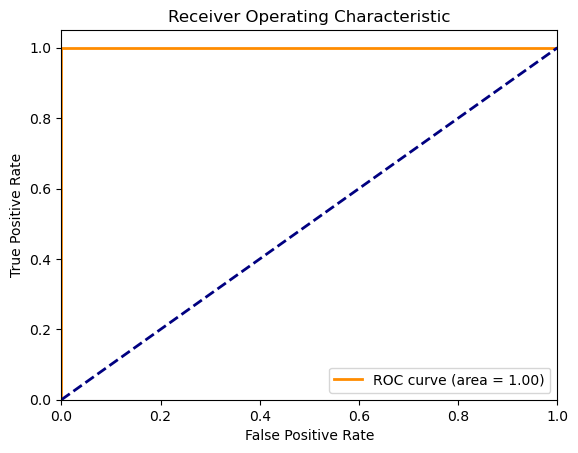

In [89]:
# Predict probabilities
y_pred_proba = best_model.predict_proba(rescaledX_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
